In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, TimeDistributed, Dense, Dropout, LayerNormalization

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Masking
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
def get_dataset():
    """
    Reads multiple CSV files and returns only the non-empty rows from all files.

    Returns:
        list: A combined list of non-empty rows from all CSV files.
    """
    valid_rows = []

    # List of file paths
    file_paths = ["./dataset/train_preprocess.csv", "./dataset/valid_preprocess.csv", "./dataset/test_preprocess.csv"]

    # Loop through each file and collect non-empty rows
    for file_path in file_paths:
        with open(file_path, 'r') as csv_file:
            reader = csv.reader(csv_file)
            valid_rows.extend(row for row in reader if row)  # Add non-empty rows to valid_rows

    return valid_rows

In [4]:
dataset = get_dataset()


In [5]:
sentences = []
labels=[]
for row in dataset:
  sentences.append(row[0])
  labels.append(row[1])



In [6]:
label_mapping = {
    'B-NN': 'Noun',
    'I-NN': 'Noun',
    'B-SC': 'Conjunction',
    'I-SC': 'Conjunction',
    'B-VB': 'Verb',
    'I-VB': 'Verb',
    'B-NNP': 'ProperNoun',
    'I-NNP': 'ProperNoun',
    'B-JJ': 'Adjective',
    'I-JJ': 'Adjective',
    'B-RB': 'Adverb',
    'I-RB': 'Adverb',
    'B-IN': 'Preposition',
    'I-IN': 'Preposition',
    'B-Z': 'Punctuation',
    'I-Z': 'Punctuation',
    'B-CD': 'Number',
    'I-CD': 'Number',
    'B-CC': 'CoordConj',
    'I-CC': 'CoordConj',
    'B-PR': 'Pronoun',
    'I-PR': 'Pronoun',
    'B-PRP': 'Preposition',
    'I-PRP': 'Preposition',
    'B-MD': 'Modal',
    'B-FW': 'ForeignWord',
    'B-NEG': 'Negative',
    'B-DT': 'Determiner',
    'B-NND': 'DerivedNoun',
    'I-NND': 'DerivedNoun',
    'B-SYM': 'Symbol',
    'I-SYM': 'Symbol',
    'B-RP': 'Particle',
    'B-WH': 'QuestionWord',
    'I-WH': 'QuestionWord',
    'B-OD': 'Ordinal',
    'I-OD': 'Ordinal',
    'B-X': 'Unknown',
    'I-X': 'Unknown',
    'B-UH': 'Interjection',
    'I-UH': 'Interjection'
}

In [7]:
print(sentences)
print(len(sentences))
print(labels)
print(len(labels))

['Kera', 'untuk', 'amankan', 'pesta', 'olahraga', 'Pemerintah', 'kota', 'Delhi', 'mengerahkan', 'monyet', 'untuk', 'mengusir', 'monyet-monyet', 'lain', 'yang', 'berbadan', 'lebih', 'kecil', 'dari', 'arena', 'Pesta', 'Olahraga', 'Persemakmuran', '.', 'Beberapa', 'laporan', 'menyebutkan', 'setidaknya', '10', 'monyet', 'ditempatkan', 'di', 'luar', 'arena', 'lomba', 'dan', 'pertandingan', 'di', 'ibukota', 'India', '.', 'Pemkot', 'Delhi', 'memiliki', '28', 'monyet', 'dan', 'berencana', 'mendatangkan', '10', 'monyet', 'sejenis', 'dari', 'negara', 'bagian', 'Rajasthan', '.', 'Jumlah', 'monyet', 'di', 'ibukota', 'India', 'mencapai', 'ribuan', ',', 'sebagian', 'besar', 'berada', 'di', 'kantor-kantor', 'pemerintah', 'dan', 'hewan', 'ini', 'dianggap', 'mengganggu', 'ketertiban', 'umum', '.', 'Jenis', 'monyet', 'yang', 'dikerahkan', 'pemkot', 'berbadan', 'besar', ',', 'berekor', 'panjang', ',', 'dan', 'memiliki', 'wajah', 'berwarna', 'hitam', '.', 'Monyet', 'ini', 'diikat', 'dengan', 'tali', 'panj

In [8]:
kalimat = []
label = []
current_sentence = []
current_label = []

# Loop through each word and its label
for i in range(len(sentences)):
    word = sentences[i]
    word_label = labels[i]  # Rename to avoid conflict with the labels list

    # Add word and label to the current sentence
    current_sentence.append(word)
    current_label.append(word_label)

    # If the word is a period, finalize the current sentence and start a new one
    if word == '.':
        kalimat.append(current_sentence)
        label.append(current_label)
        current_sentence = []
        current_label = []

# Add the last sentence if it was not terminated with a period
if current_sentence:
    kalimat.append(current_sentence)
    label.append(current_label)

In [9]:
unique_values = []
for item in labels:
    if item not in unique_values:
        unique_values.append(item)

print(unique_values)
print(len(unique_values))

['B-NN', 'B-SC', 'B-VB', 'I-NN', 'B-NNP', 'B-JJ', 'B-RB', 'B-IN', 'I-NNP', 'B-Z', 'B-CD', 'B-CC', 'B-PR', 'B-PRP', 'B-MD', 'B-FW', 'B-NEG', 'I-VB', 'B-DT', 'I-CD', 'B-NND', 'I-PRP', 'I-RB', 'I-JJ', 'B-SYM', 'B-RP', 'B-WH', 'B-OD', 'I-SC', 'B-X', 'I-X', 'B-UH', 'I-OD', 'I-CC', 'I-SYM', 'I-UH', 'I-WH', 'I-PR', 'I-NND', 'I-Z', 'I-IN']
41


In [10]:
tokenizer = Tokenizer(oov_token="<UNK>" )
tokenizer.fit_on_texts(kalimat)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(kalimat)

tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(label)
tag_index = tag_tokenizer.word_index
tag_sequences = tag_tokenizer.texts_to_sequences(label)


max_len = max([len(s) for s in sequences])
X_train = pad_sequences(sequences, maxlen=max_len, padding='post')
y_train = pad_sequences(tag_sequences, maxlen=max_len, padding='post')

num_tags = len(tag_index)  # Add 1 for the padding tag
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_tags+1)

print(f"Vocabulary size: {len(word_index)}")
print(f"Number of POS tags: {num_tags}")

# Padding the sequences for sentences and tags
max_len = max(len(seq) for seq in sequences)
sequences_padded = pad_sequences(sequences, maxlen=max_len, padding='post')
tag_sequences_padded = pad_sequences(tag_sequences, maxlen=max_len, padding='post')

num_tags = len(tag_index)
tag_sequences_onehot = [to_categorical(seq, num_classes=num_tags + 1) for seq in tag_sequences_padded]

X_train, X_val, y_train, y_val = train_test_split(sequences_padded, np.array(tag_sequences_onehot), test_size=0.2, random_state=42)

# Define model parameters
vocab_size = len(word_index) + 1   # Add 1 for padding token
embedding_dim = 64
lstm_units = 128

Vocabulary size: 15574
Number of POS tags: 41


In [11]:
print(f"Input shape (x): {sequences_padded.shape}")
print(f"Label shape (y): {np.array(tag_sequences_onehot).shape}")

Input shape (x): (10177, 153)
Label shape (y): (10177, 153, 42)


In [12]:
def create_model(vocab_size, embedding_dim, max_length):
  model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),  # Dropout layer to reduce overfitting

    # Additional Bidirectional LSTM layer for deeper learning
    Bidirectional(LSTM(64, return_sequences=True)),
    LayerNormalization(),  # Layer normalization for stabilizing training

    # Another LSTM layer to capture more sequential patterns
    Bidirectional(LSTM(32, return_sequences=True)),
    Dropout(0.3),

    # TimeDistributed Dense layer for output
    TimeDistributed(Dense(64, activation='relu')),  # Additional dense layer for feature extraction
    Dropout(0.3),  # Dropout for regularization

    Dense(42, activation='softmax')  # Output layer for num_tags classes,
  ])

  model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

  return model

In [13]:
model = create_model(vocab_size, embedding_dim, max_len)
# Train the model
hist = model.fit(
    X_train,
    y_train,
    batch_size=64,  # Use a reasonable batch size
    epochs=10,
    validation_data=(X_val, y_val),  # Use validation data for evaluation
    verbose=1
)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.7186 - loss: 1.4118 - val_accuracy: 0.8753 - val_loss: 0.4143
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 136s 998ms/step - accuracy: 0.8748 - loss: 0.4233 - val_accuracy: 0.8979 - val_loss: 0.3353
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 142s 998ms/step - accuracy: 0.9000 - loss: 0.3279 - val_accuracy: 0.9543 - val_loss: 0.1768
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9491 - loss: 0.1795 - val_accuracy: 0.9819 - val_loss: 0.0820
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.9771 - loss: 0.0948 - val_accuracy: 0.9873 - val_loss: 0.0554
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.9857 - loss: 0.0611 - val_accuracy: 0.9886 - val_loss: 0.0470
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9891 - loss: 0.0467 - val_accuracy: 0.9894 - val_loss: 0.0439
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9906 - loss: 0.0391 - va

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 153, 64)             │         996,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 153, 128)            │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 153, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 153, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 153, 128)            │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 153, 64)             │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 153, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 153, 64)             │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 153, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 153, 42)             │           2,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,630,080 (13.85 MB)

 Trainable params: 1,210,026 (4.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,420,054 (9.23 MB)

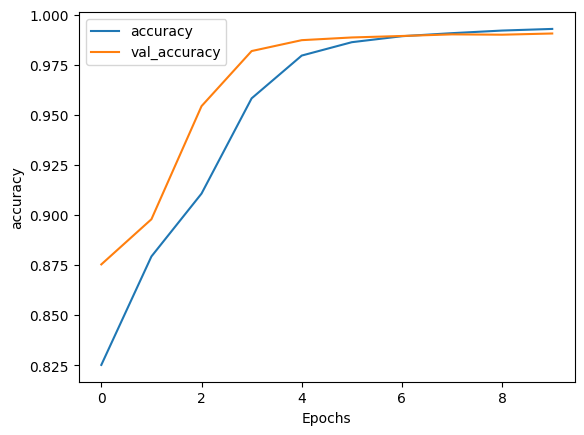

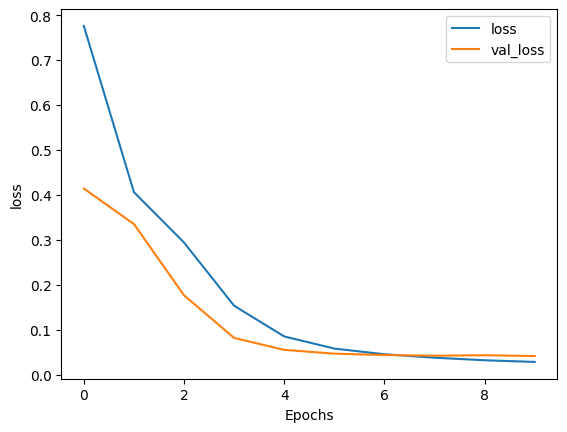

In [14]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(hist, "accuracy")
plot_graphs(hist, "loss")

In [15]:
train_loss, train_acc = model.evaluate(X_train, y_train)
val_loss, val_acc = model.evaluate(X_val, y_val)

# Print out the results
print(f"Train Accuracy\t\t: {train_acc * 100:.2f}% | Train Loss\t\t: {train_loss}")
print(f"Validation Accuracy\t: {val_acc * 100:.2f}% | Validation Loss\t: {val_loss}")

255/255 ━━━━━━━━━━━━━━━━━━━━ 33s 128ms/step - accuracy: 0.9961 - loss: 0.0144
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.9906 - loss: 0.0421
Train Accuracy		: 99.62% | Train Loss		: 0.014487070962786674
Validation Accuracy	: 99.06% | Validation Loss	: 0.041640572249889374


In [17]:
# FUCNTION BUAT PREDIKSI

def predict_pos_tags(input_sentence : str):
  # Tokenize the input sentence
  test_sentence =  input_sentence.split()
  original_sentence_length = len(test_sentence)

  test_sentence.append("UNK") # trigger

  test_sequence = tokenizer.texts_to_sequences([test_sentence])
  test_sequence_padded = pad_sequences(test_sequence, maxlen=max_len, padding='post')

  # Get predicted tag indices
  predictions = model.predict(test_sequence_padded, verbose=False)
  predicted_tags = np.argmax(predictions, axis=-1)


  predicted_tags_list = [list(tag_index.keys())
                       [list(tag_index.values()).index(p)] for p in predicted_tags[0] if p != 0]

  predicted_tags_list = [label_mapping[label.upper()] for label in predicted_tags_list]
  predicted_tags_list = predicted_tags_list[:original_sentence_length]


  # print result
  print(f"Sentence: {input_sentence}")
  print(f"Predicted POS tags: {predicted_tags_list}")

sample = "Kera di hutan mencoba lari"
predict_pos_tags(sample)

Sentence: Kera di hutan mencoba lari
Predicted POS tags: ['Noun', 'Preposition', 'Noun', 'Verb', 'Verb']


In [20]:
model.save('model_POS_v3.h5')